# 신용거래 이상탐지
## 목표 : 사기거래 여부 예측하기 위한 데이터 준비
### 평가문항
- 다수의 컬럼이름 변경 및 다양한 방법으로 결측치 처리
- 데이터 안의 이상치 감지 및 수정
- 주어진 변수에서 추가적인 변수 생성

### 꼭 해봐야 할 것
- 사기거래 여부 예측하는 데 불필요한 컬럼 제거
- 최소 2개 이상의 새로운 피처 생성
    - 구매금액, 시간 등의 변수 이용
    
    
### 여유가 된다면..
- 데이터 위도/경도 정보 활용
- 통계적 관점으로 접근한 유용한 변수 창출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',50)

In [3]:
original_data = pd.read_csv('./data/fraud.csv')
original_data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [4]:
original_data.info() #null 값이 없어보인다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

중복값이 있나 확인

In [5]:
data = original_data.copy()

In [6]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


descibe를 해봤을 때, 나타나는 특징!
- amt가 매우 적은 것이 존재하는 것 같다
- lat long과 merch_lat merch_long이 차이에 주목할 필요가 있다

job은 여러개가 있는 경우도 있다
- 우선 unique한 job이 몇개인지 확인해본다.

zip가 4자리인 아이들 존재
- 28477개 / 4911334개
- fraud : 92/ 28477
- 7개 해당하는 도시가 4자리 / 총 121개의 도시


In [7]:
data[data.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [8]:
for col_name in data.columns:
    print(col_name)
    display(data[col_name].nunique())

trans_date_trans_time


488474

cc_num


124

merchant


693

category


14

amt


36446

first


92

last


102

gender


2

street


124

city


121

state


44

zip


124

lat


124

long


124

city_pop


122

job


110

dob


123

trans_num


491134

unix_time


488477

merch_lat


484503

merch_long


487445

is_fraud


2

우선 보이는게, merchant 앞에 fraud라고 붙어있는 것과 is_fraud가 0인점인데, 이를 확인해보자

In [9]:
data[data['merchant'].str[:5]=='fraud']

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


- 확인해보니 merchant 이름 모두에 fraud가 붙어져 있는 상황 -> fraud 제거
- fraud data는 1244개

In [10]:
data['merchant'] = data['merchant'].str[6:]

In [11]:
print('unique한 merchant 이름갯수 :', data['merchant'].nunique())
print('unique한 거래가 fraud인 merchant 이름갯수 :', data[data['is_fraud']==1]['merchant'].nunique())
print('unique한 fisrt 이름갯수 :', data['first'].nunique())
print('unique한 거래가 fraud인 first 이름갯수 :', data[data['is_fraud']==1]['first'].nunique())

print('unique한 last 이름갯수 :', data['last'].nunique())
print('unique한 거래가 fraud인 last 이름갯수 :', data[data['is_fraud']==1]['last'].nunique())

unique한 merchant 이름갯수 : 693
unique한 거래가 fraud인 merchant 이름갯수 : 497
unique한 fisrt 이름갯수 : 92
unique한 거래가 fraud인 first 이름갯수 : 92
unique한 last 이름갯수 : 102
unique한 거래가 fraud인 last 이름갯수 : 100


### customer와 관련된 요소들을 합해보자

In [12]:
temp_df = data[['first','last','gender']]
temp_df['customer_name'] = data['first'] + '_' + data['last']+'_'+data['gender']
temp_df

/tmp/ipykernel_203/1131605669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['customer_name'] = data['first'] + '_' + data['last']+'_'+data['gender']


,first,last,gender,customer_name
0,Stephanie,Gill,F,Stephanie_Gill_F
1,Kenneth,Robinson,M,Kenneth_Robinson_M
2,Mary,Wall,F,Mary_Wall_F
3,Daniel,Escobar,M,Daniel_Escobar_M
4,Jenna,Brooks,F,Jenna_Brooks_F
...,...,...,...,...
491129,Rebecca,Erickson,F,Rebecca_Erickson_F
491130,Ana,Howell,F,Ana_Howell_F
491131,Jose,Vasquez,M,Jose_Vasquez_M
491132,Ann,Lawson,F,Ann_Lawson_F


In [13]:
#temp_df['customer_name'].nunique()# 124

#data.dob.nunique() # 123 상관없다고 생각

#data.cc_num.nunique() #카드번호도 unique한 것이 124개인 것을 파악

customer_name이 first+last 라고 했을 때,

124개 밖에 없는 것을 확인 -> 원래 데이터에다 적용(first,last drop)

dob값이랑 customer_name이 안맞는거 찾아보자

여기서 고유의 값을 가지는 것이 cc_num,customer_name(cc_num), dob 인 것을 알 수있음 그렇다면 이 세개를 하나로 취급할 수 있을 것 같음

In [14]:
data_cc = data.copy()
#data_c['customer_name'] = data['first']+'_'+data['last']
data_cc = data_cc.drop(['first','last','dob'],axis=1)

### state와 city feature를 정리해보자

In [15]:
temp_df = data_cc[['state','city','is_fraud']]

temp_df['loc'] = temp_df.state+temp_df.city
temp_df = temp_df.drop(['state','city'],axis=1)
#temp_df[temp_df.is_fraud == 1]

/tmp/ipykernel_203/3373753508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['loc'] = temp_df.state+temp_df.city


In [16]:
#data_cc.city.nunique() #121
#temp_df['loc'].nunique() #123
#data_cc.state.nunique() # 44
#data_cc[data_cc.is_fraud==1].state.nunique() # 44
#data_cc[data_cc.is_fraud==1].city.nunique() # 119

In [17]:
data_cc['location'] = data_cc.state + '_' + data_cc.city
data_loc = data_cc.drop(['state','city'],axis=1)

### street과 zipcode

zipcode가 city, state, street를 모두 나타내줄 수 있을 것 같음

In [18]:
data_loc = data_loc.drop(['location','street'],axis=1)

### job의 카테고리를 줄여보자

마지막 단어를 활용해서 카테고리를 정리할 수 있어보임

In [19]:
#data_loc['job'].nunique() # 110
#data_loc['job'].str.split().str[-1].nunique() # 84

In [20]:
data_loc['job_type'] = data_loc['job'].str.split().str[-1]

In [21]:
data_j = data_loc.drop(['job'],axis=1)

In [22]:
data_j.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,job_type
0,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,teacher
1,2019-01-01 00:12:34,4956828990005111019,"Schultz, Simonis and Little",grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,researcher
2,2019-01-01 00:17:16,180048185037117,Kling-Grant,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,manager
3,2019-01-01 00:20:15,374930071163758,Deckow-O'Conner,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,officer
4,2019-01-01 00:23:41,2712209726293386,Balistreri-Nader,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,furniture


### 시간을 정리해보자
시간을 연 월 일 시로 나누고 unix_time은 없애는게 좋을 것 같음

In [23]:
data_time = data_j.drop(['unix_time'],axis=1)

In [24]:
def get_time(str_date,c):
    if c == 'year':
        return int(str_date[:4])
    elif c == 'month':
        return int(str_date[5:7])
    elif c == 'day' :
        return int(str_date[8:10])
    elif c == 'hour' :
        return int(str_date[11:13])
    elif c == 'minute' :
        return int(str_date[14:16])
    else:
        return None

In [25]:
date_list = ['year','month','day','hour','minute']
for date in date_list :
    data_time[date] =data_time['trans_date_trans_time'].apply(lambda x: get_time(x,date))

In [26]:
data_time = data_time.drop('trans_date_trans_time',axis=1)

In [27]:
data_time.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud,job_type,year,month,day,hour,minute
0,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,teacher,2019,1,1,0,0
1,4956828990005111019,"Schultz, Simonis and Little",grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,researcher,2019,1,1,0,12
2,180048185037117,Kling-Grant,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,manager,2019,1,1,0,17
3,374930071163758,Deckow-O'Conner,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,officer,2019,1,1,0,20
4,2712209726293386,Balistreri-Nader,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,furniture,2019,1,1,0,23


In [28]:
temp1 = data_time.merchant.unique() #693
temp2 = data_time[data_time.is_fraud==1].merchant.unique() #497
frauded = [i for i in temp1 if i in temp2]

In [29]:
type(frauded)

list

In [30]:
data_time[data_time['merchant'].isin(frauded)]

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud,job_type,year,month,day,hour,minute
0,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,teacher,2019,1,1,0,0
1,4956828990005111019,"Schultz, Simonis and Little",grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,researcher,2019,1,1,0,12
2,180048185037117,Kling-Grant,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,manager,2019,1,1,0,17
3,374930071163758,Deckow-O'Conner,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,officer,2019,1,1,0,20
4,2712209726293386,Balistreri-Nader,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,furniture,2019,1,1,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,Botsford and Sons,home,134.26,F,28405,34.2651,-77.8670,186140,fc860b0d1f89b0b068c9c8db27b6bcc5,34.853497,-78.664158,0,teacher,2020,12,31,23,56
491130,213112402583773,"Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,29819,34.0326,-82.2027,1523,0f0c38fe781b317f733b845c0d6ba448,35.008839,-81.475156,0,sciences),2020,12,31,23,56
491131,3556613125071656,Hoppe-Parisian,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,trader,2020,12,31,23,59
491132,6011724471098086,Rau-Robel,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,Musician,2020,12,31,23,59


In [31]:
data_time[(data_time['merchant'].isin(frauded))&(data_time.is_fraud==1)]

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud,job_type,year,month,day,hour,minute
4794,581686439828,"Zieme, Bode and Dooley",gas_transport,11.73,M,16314,41.5205,-80.0573,5507,77c44b4cff9a624f54d389887605dbb2,41.947427,-79.796264,1,merchandiser,2019,1,12,0,59
4816,581686439828,Koepp-Witting,grocery_pos,328.68,M,16314,41.5205,-80.0573,5507,90e7917ee506a5b1ea068bdf2fac064b,42.148618,-79.398595,1,merchandiser,2019,1,12,3,48
4979,581686439828,Abernathy and Sons,food_dining,120.58,M,16314,41.5205,-80.0573,5507,aaac448ccb3f869994c4f1cad95dba18,42.470024,-80.126576,1,merchandiser,2019,1,12,15,46
5073,581686439828,Boyer-Reichert,shopping_net,1081.35,M,16314,41.5205,-80.0573,5507,8545f40c91a37f8015749b0f962cff20,42.455406,-79.521640,1,merchandiser,2019,1,12,19,53
5124,581686439828,Fisher-Schowalter,shopping_net,776.70,M,16314,41.5205,-80.0573,5507,3b6d88a3c7349cb3ee408bce6e4ffac2,40.680209,-79.099101,1,merchandiser,2019,1,12,22,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,4716561796955522,Murray-Smitham,grocery_pos,358.24,F,59448,48.2777,-112.8456,743,8a5d80eb4f573480db90899dd8b1c34a,47.526202,-113.643313,1,engineer,2020,12,21,2,21
477847,4716561796955522,Schmidt and Sons,shopping_net,859.12,F,59448,48.2777,-112.8456,743,fe8464ee336fe08b2adacdd0867b1343,48.272348,-112.328075,1,engineer,2020,12,21,2,36
479296,4716561796955522,Quitzon-Goyette,home,209.84,F,59448,48.2777,-112.8456,743,7cde9b7604a025e251756a4bc9615888,49.173669,-112.698767,1,engineer,2020,12,21,22,38
479305,4716561796955522,Schulist Ltd,food_dining,123.58,F,59448,48.2777,-112.8456,743,daabc7ccf6ccf2c85c1f6186ca11193a,48.913048,-113.214921,1,engineer,2020,12,21,22,42


fraud인 merchant와 아닌 merchant가 꽤 겹치는 상황
일단은 제거

그리고 위도,경도의 차이를 피쳐로 써보자

In [32]:
data_total = data_time.drop('merchant',axis=1)

In [33]:
data_total

,cc_num,category,amt,gender,zip,lat,long,city_pop,trans_num,merch_lat,merch_long,is_fraud,job_type,year,month,day,hour,minute
0,630423337322,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,teacher,2019,1,1,0,0
1,4956828990005111019,grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,researcher,2019,1,1,0,12
2,180048185037117,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,manager,2019,1,1,0,17
3,374930071163758,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,officer,2019,1,1,0,20
4,2712209726293386,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,furniture,2019,1,1,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,home,134.26,F,28405,34.2651,-77.8670,186140,fc860b0d1f89b0b068c9c8db27b6bcc5,34.853497,-78.664158,0,teacher,2020,12,31,23,56
491130,213112402583773,shopping_pos,25.49,F,29819,34.0326,-82.2027,1523,0f0c38fe781b317f733b845c0d6ba448,35.008839,-81.475156,0,sciences),2020,12,31,23,56
491131,3556613125071656,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,trader,2020,12,31,23,59
491132,6011724471098086,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,Musician,2020,12,31,23,59


In [34]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers (use 3958.8 miles for miles)
    radius = 6371.0

    # Calculate the distance
    distance = radius * c

    return distance

In [35]:
data_total['dist'] = data_total.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [36]:
data_total = data_total.drop(['lat','long','merch_lat','merch_long'],axis=1)

In [37]:
try1 = data_total.drop(['cc_num','trans_num','is_fraud'],axis=1)

In [38]:
try1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   category  491134 non-null  object 
 1   amt       491134 non-null  float64
 2   gender    491134 non-null  object 
 3   zip       491134 non-null  int64  
 4   city_pop  491134 non-null  int64  
 5   job_type  491134 non-null  object 
 6   year      491134 non-null  int64  
 7   month     491134 non-null  int64  
 8   day       491134 non-null  int64  
 9   hour      491134 non-null  int64  
 10  minute    491134 non-null  int64  
 11  dist      491134 non-null  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 45.0+ MB


In [39]:
try1 = pd.get_dummies(try1,['category','job_type','gender'],drop_first=True)

In [40]:
try2 = data_total[data_total.amt<5000]
try2 = try2.drop(['cc_num','trans_num','is_fraud'],axis=1)
try2 = pd.get_dummies(try2,['category','job_type','gender'],drop_first=True)

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler
# Assuming X is your feature matrix
# You may need to replace X with your actual feature matrix

# Scale the data
s_scaler = StandardScaler()
#r_scaler = RobustScaler()
#m_scaler = MinMaxScaler()
#r_scaled = r_scaler.fit_transform(try1)
#m_scaled = m_scaler.fit_transform(try1)
s_scaled = s_scaler.fit_transform(try2)

# Apply PCA
pca = PCA()
#r_pca = PCA()
#m_pca = PCA()
s_pca = pca.fit(s_scaled)# Apply PCA
#r_pca = r_pca.fit(r_scaled)
#m_pca = m_pca.fit(m_scaled)

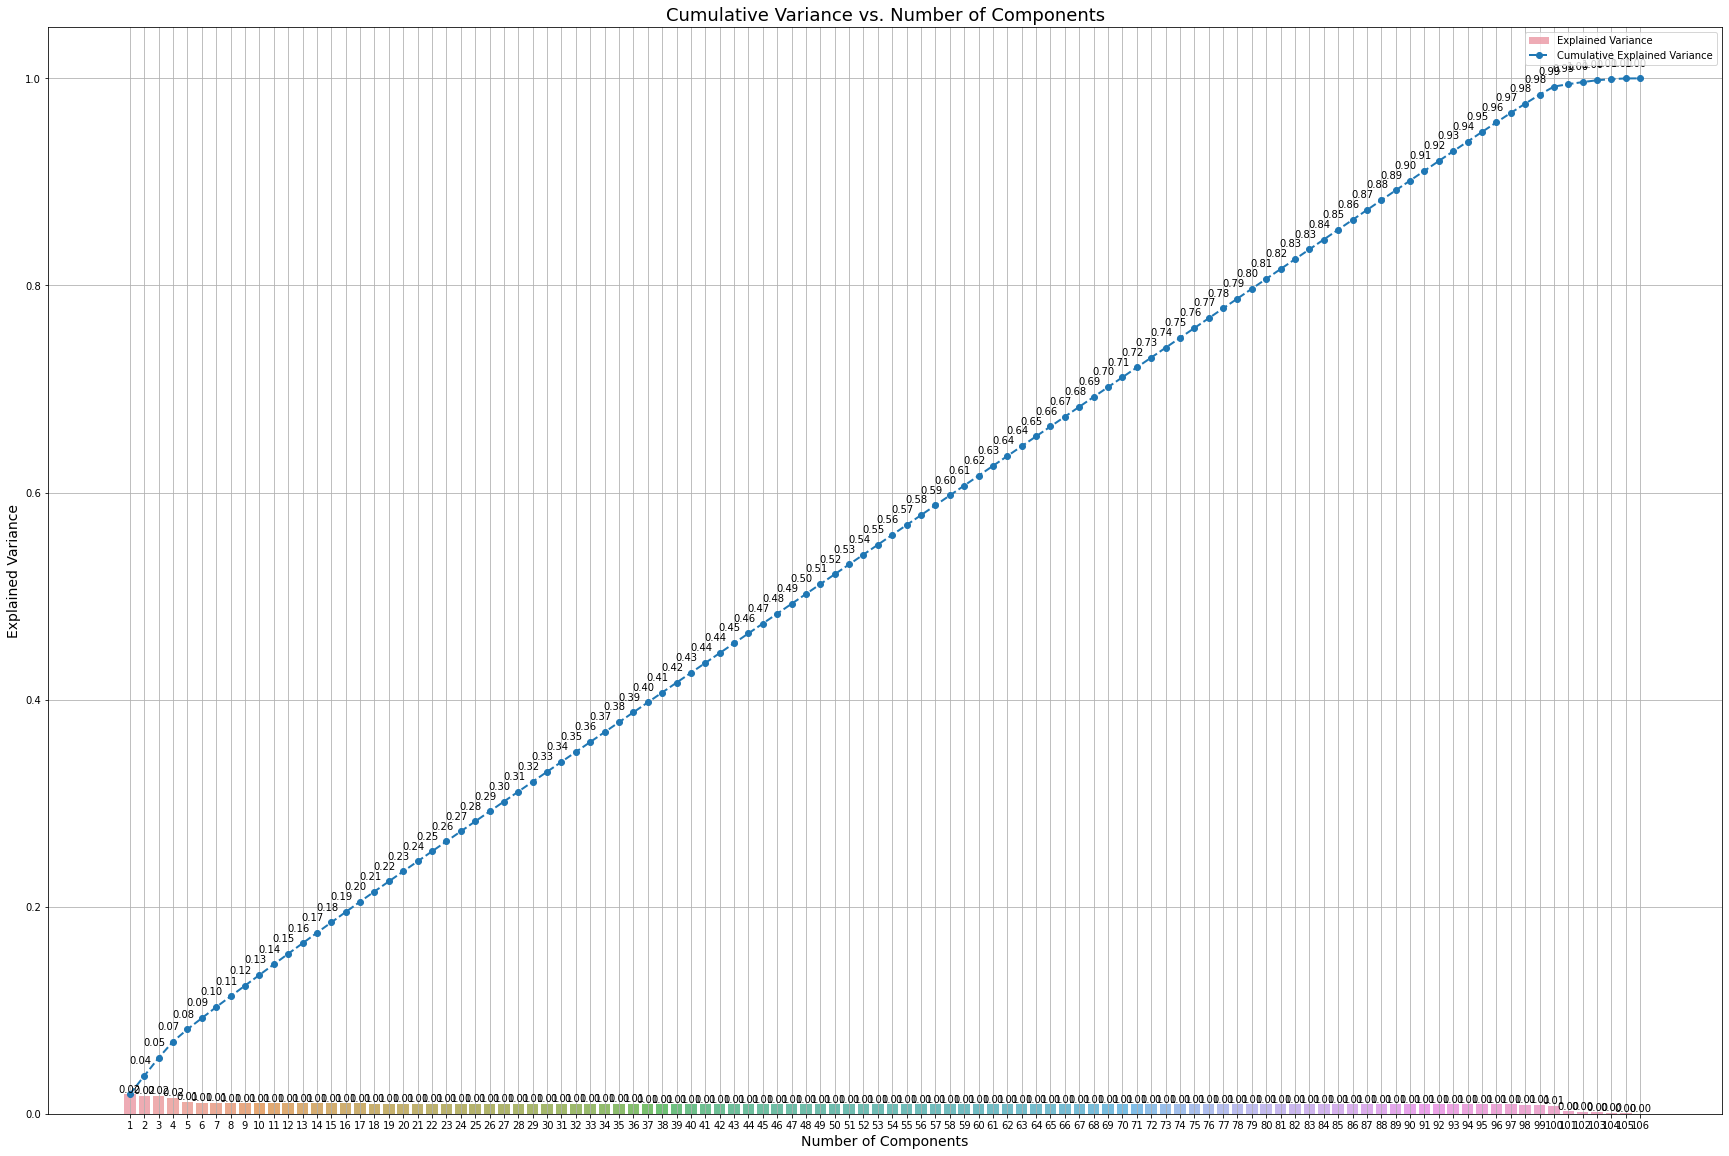

In [42]:
# Explained Variance의 누적합 계산  
explained_variance_ratio = s_pca.explained_variance_ratio_
# explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# cumsum: 각 원소의 누적합을 계산하는 함수
plt.figure(figsize=(30, 20)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()



In [43]:
# # Explained Variance의 누적합 계산  
# explained_variance_ratio = m_pca.explained_variance_ratio_
# # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# # cumsum: 각 원소의 누적합을 계산하는 함수
# plt.figure(figsize=(30, 20)) 

# # 각 성분의 설명된 분포에 대한 막대 그래프
# barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# # 누적 분포에 대한 선 그래프
# lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# # 레이블과 제목 설정
# plt.xlabel('Number of Components', fontsize=14)
# plt.ylabel('Explained Variance', fontsize=14)
# plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# # 눈금 및 범례 사용자 정의
# plt.xticks(range(0, len(cumulative_explained_variance)))
# plt.legend(handles=[barplot.patches[0], lineplot],
#            labels=['Explained Variance', 'Cumulative Explained Variance'])  

# # 두 그래프의 분산 값 표시
# x_offset = -0.3
# y_offset = 0.01
# for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
#     plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
#     if i > 0:
#         plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

# plt.grid(axis='both')   
# plt.show()

# n_components = 38

In [44]:
# # Explained Variance의 누적합 계산  
# explained_variance_ratio = m_pca.explained_variance_ratio_
# # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# # cumsum: 각 원소의 누적합을 계산하는 함수
# plt.figure(figsize=(30, 20)) 

# # 각 성분의 설명된 분포에 대한 막대 그래프
# barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# # 누적 분포에 대한 선 그래프
# lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# # 레이블과 제목 설정
# plt.xlabel('Number of Components', fontsize=14)
# plt.ylabel('Explained Variance', fontsize=14)
# plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# # 눈금 및 범례 사용자 정의
# plt.xticks(range(0, len(cumulative_explained_variance)))
# plt.legend(handles=[barplot.patches[0], lineplot],
#            labels=['Explained Variance', 'Cumulative Explained Variance'])  

# # 두 그래프의 분산 값 표시
# x_offset = -0.3
# y_offset = 0.01
# for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
#     plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
#     if i > 0:
#         plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

# plt.grid(axis='both')   
# plt.show()

# n_components = 38

In [45]:
pca = PCA(n_components=100)
pca_data = pca.fit_transform(s_scaled)

In [46]:
pca_data = pd.DataFrame(pca_data, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

In [48]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(pca_data)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_) 

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
try2['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
pca_data['cluster'] = new_labels

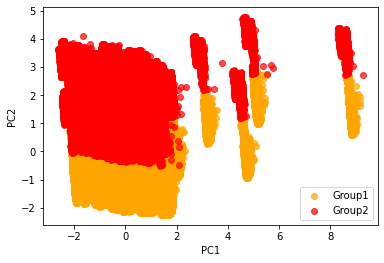

In [49]:
cluster_0 = pca_data[pca_data['cluster'] == 0]
cluster_1 = pca_data[pca_data['cluster'] == 1]


# 클러스터 별 시각화
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [51]:
try2[(original_data[original_data.amt<5000]['is_fraud']==try2['cluster'])&(try2['cluster']==1)]

,amt,zip,city_pop,year,month,day,hour,minute,dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,job_type_M,gender_Comptroller,gender_Contractor,...,gender_operator,gender_optician,gender_party,gender_photographer,gender_physicist,gender_planner,gender_practice,gender_psychologist,gender_psychotherapist,gender_public,gender_representative,gender_researcher,gender_sciences),gender_sports,gender_sub,gender_surgeon,gender_surveyor,gender_teacher,gender_technologist,gender_therapeutic,gender_therapist,gender_trader,gender_trainer,gender_underwriter,cluster
4794,11.73,16314,5507,2019,1,12,0,59,52.180132,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4816,328.68,16314,5507,2019,1,12,3,48,88.635095,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5160,952.08,36617,270712,2019,1,13,0,49,10.923534,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5171,1060.34,36617,270712,2019,1,13,1,31,113.741708,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5240,308.84,16314,5507,2019,1,13,7,26,86.217372,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476545,866.79,59448,743,2020,12,20,8,44,56.845304,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
477746,338.60,59448,743,2020,12,21,0,21,74.373963,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
477814,349.96,59448,743,2020,12,21,2,2,36.793191,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
477832,358.24,59448,743,2020,12,21,2,21,102.560404,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Robust Scaler를 써본 결과 :
29/1244 를 맞췄음;;

Standard Scaler를 써본 결과 :
431/ 1244, 327590/491134 -> 66.79%

In [ ]:
sns.boxplot(data_total.amt)

In [ ]:
data_total[data_total.amt>7000]

In [ ]:
sns.boxplot(data_total[data_total.is_fraud==1].amt)

### 확인해보니 fraud가 아닌 애들 중에 돈이 너무 많이 들어가는 사람들이 있었음. 이를 제거 해보자

그 결과 648/1244 로 저금 더 늘어남

# 회고
오늘 feature engineering을 진행해보았다. 우선 21가지의 많은 feature들을 줄이거나 늘리거나 해보았고, knn을 통해 그룹을 만들어 보았다. feature engineerin에는 데이터를 만지는 사람의 주관적인 관점이 많이 들어간다. 따라서, 위의 결과는 아직 내가 데이터의 중요 정보를 못 뽑는 다는 것을 의미하기도 한다. 시간이 조금남아 두번째 경우의 수인 amt의 이상치 데이터를 어느정도 제거하니 fraud detect 비율이 조금 더 늘어났다. 내 생각에는 데이터의 불균형이 모델의 정확도에 매우 큰 영향을 미치기 때문에 이런 결과가 나오지 않았나 싶다